# Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Load the Data set

In [2]:
train_data = pd.read_csv("C:/Users/Hi/OneDrive/Documents/ML_PROJECTS_DATA/train.csv")

In [3]:
test_data = pd.read_csv("C:/Users/Hi/OneDrive/Documents/ML_PROJECTS_DATA/test.csv")

In [4]:
train_data['data'] = 'train'
test_data['data'] = 'test'

In [5]:
print(train_data.shape, test_data.shape)

(1460, 82) (1459, 81)


In [6]:
## concatination of the test and train data

all_data = pd.concat([train_data, test_data], axis=0)

In [7]:
all_data.shape

(2919, 82)

In [8]:
1460+1459

2919

In [9]:
all_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,data
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0,train
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0,train
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0,train
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0,train
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0,train


## Preprocessing

In [10]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [11]:
for i in all_data.columns:
    print("************************",i,"*****************")
    print()
    print(set(all_data[i].tolist()))
    print()

************************ Id *****************

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 

# Handling Missing values

In [12]:
all_data.isnull().sum().head(40)

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      486
LotArea            0
Street             0
Alley           2721
LotShape           0
LandContour        0
Utilities          2
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        1
Exterior2nd        1
MasVnrType        24
MasVnrArea        23
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinSF1         1
BsmtFinType2      80
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Heating            0
dtype: int64

In [13]:
## Alley
2721/2919*100

93.21685508735868

In [14]:
#LotFrontage
486/2919*100

16.649537512846866

In [15]:
#FireplaceQu
1420/2919*100

48.646796848235695

In [16]:
#PoolQC
2909/2919*100

99.65741692360398

In [17]:
#Fence
2348/2919*100

80.4385063377869

In [18]:
#MiscFeature
2814/2919*100

96.40287769784173

In [19]:
all_data.isnull().sum().tail(41)

CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea           0
BsmtFullBath        2
BsmtHalfBath        2
FullBath            0
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         1
TotRmsAbvGrd        0
Functional          2
Fireplaces          0
FireplaceQu      1420
GarageType        157
GarageYrBlt       159
GarageFinish      159
GarageCars          1
GarageArea          1
GarageQual        159
GarageCond        159
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
PoolQC           2909
Fence            2348
MiscFeature      2814
MiscVal             0
MoSold              0
YrSold              0
SaleType            1
SaleCondition       0
SalePrice        1459
data                0
dtype: int64

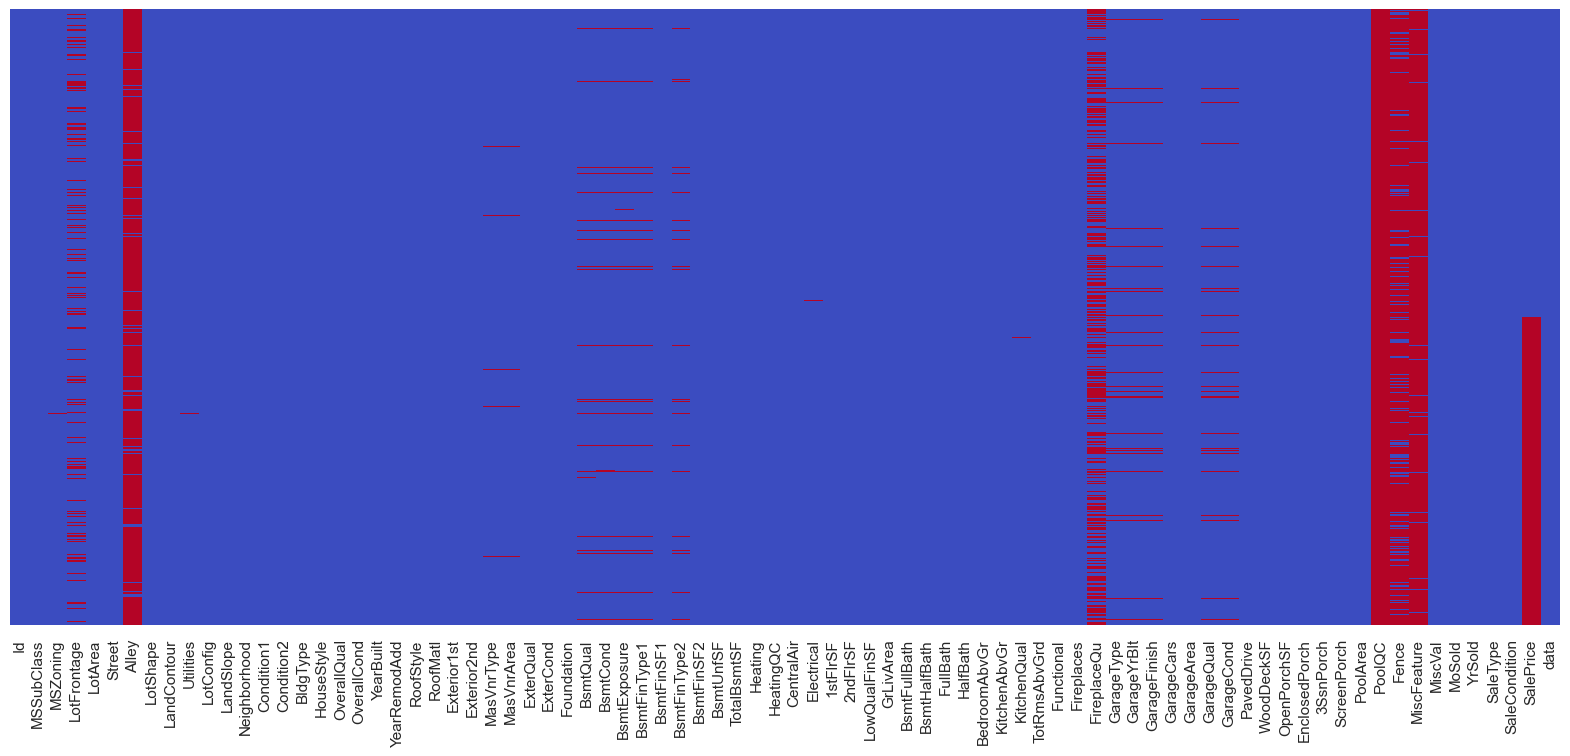

In [20]:
# Let's visually inspect the missing values in our data
plt.figure(figsize=(20,8))
sns.heatmap(all_data.isnull(), cbar=False, cmap='coolwarm',yticklabels=False)
plt.show()

In [21]:
# Dropping columns with more than 25% missing value
all_data1 = all_data.drop(['Alley','FireplaceQu','PoolQC','Fence','MiscFeature'], axis=1)

In [22]:
# LotFrontage
# BsmtQual          37
# BsmtCond          37
# BsmtExposure      38
# BsmtFinType1      37
# Electrical 
# BsmtFinType2  
# GarageType         81
# GarageYrBlt        81
# GarageFinish       81
        
# GarageQual         81
# MasVnrType         8
# MasVnrArea  

In [23]:
# Let's check the number of outliers per columns

Q1 = all_data1.quantile(0.25)
Q3 = all_data1.quantile(0.75)
IQR = Q3 - Q1
UL = Q3 + 1.5 * IQR
LL = Q1 - 1.5 * IQR

In [24]:
((all_data1 > UL) | (all_data1 < LL)).sum().head(40)

1stFlrSF          42
2ndFlrSF           8
3SsnPorch         37
BedroomAbvGr      78
BldgType           0
BsmtCond           0
BsmtExposure       0
BsmtFinSF1        15
BsmtFinSF2       347
BsmtFinType1       0
BsmtFinType2       0
BsmtFullBath       2
BsmtHalfBath     175
BsmtQual           0
BsmtUnfSF         53
CentralAir         0
Condition1         0
Condition2         0
Electrical         0
EnclosedPorch    459
ExterCond          0
ExterQual          0
Exterior1st        0
Exterior2nd        0
Fireplaces        12
Foundation         0
FullBath           4
Functional         0
GarageArea        42
GarageCars        17
GarageCond         0
GarageFinish       0
GarageQual         0
GarageType         0
GarageYrBlt        3
GrLivArea         74
HalfBath           0
Heating            0
HeatingQC          0
HouseStyle         0
dtype: int64

In [25]:
((all_data1 > UL) | (all_data1 < LL)).sum().tail(41)

HalfBath           0
Heating            0
HeatingQC          0
HouseStyle         0
Id                 0
KitchenAbvGr     134
KitchenQual        0
LandContour        0
LandSlope          0
LotArea          128
LotConfig          0
LotFrontage      198
LotShape           0
LowQualFinSF      40
MSSubClass       207
MSZoning           0
MasVnrArea       200
MasVnrType         0
MiscVal          103
MoSold             0
Neighborhood       0
OpenPorchSF      159
OverallCond      252
OverallQual        4
PavedDrive         0
PoolArea          13
RoofMatl           0
RoofStyle          0
SaleCondition      0
SalePrice         61
SaleType           0
ScreenPorch      256
Street             0
TotRmsAbvGrd      51
TotalBsmtSF      122
Utilities          0
WoodDeckSF        67
YearBuilt          9
YearRemodAdd       0
YrSold             0
data               0
dtype: int64

In [26]:
# MSZoning

all_data1['MSZoning'].isnull().sum()

4

In [27]:
all_data1['MSZoning'].value_counts()

RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64

In [28]:
all_data1['MSZoning'] = all_data1['MSZoning'].fillna('RL')

In [29]:
#Utilities
all_data1['Utilities'].value_counts()

AllPub    2916
NoSeWa       1
Name: Utilities, dtype: int64

In [30]:
all_data1['Utilities'] = all_data1['Utilities'].fillna('AllPub')

In [31]:
#Exterior1st
all_data1['Exterior1st'].value_counts()

VinylSd    1025
MetalSd     450
HdBoard     442
Wd Sdng     411
Plywood     221
CemntBd     126
BrkFace      87
WdShing      56
AsbShng      44
Stucco       43
BrkComm       6
AsphShn       2
Stone         2
CBlock        2
ImStucc       1
Name: Exterior1st, dtype: int64

In [32]:
all_data1['Exterior1st'] = all_data1['Exterior1st'].fillna('VinylSd')

In [33]:
all_data1['Exterior2nd'].isnull().sum()

1

In [34]:
#Exterior2nd
all_data1['Exterior2nd'].value_counts()

VinylSd    1014
MetalSd     447
HdBoard     406
Wd Sdng     391
Plywood     270
CmentBd     126
Wd Shng      81
BrkFace      47
Stucco       47
AsbShng      38
Brk Cmn      22
ImStucc      15
Stone         6
AsphShn       4
CBlock        3
Other         1
Name: Exterior2nd, dtype: int64

In [35]:
all_data1['Exterior2nd'] = all_data1['Exterior2nd'].fillna('VinylSd')

In [36]:
all_data1['LotFrontage'] = all_data1['LotFrontage'].fillna(all_data1['LotFrontage'].median())

In [37]:
all_data1['MasVnrArea'] = all_data1['MasVnrArea'].fillna(all_data1['MasVnrArea'].median())

In [38]:
all_data1['BsmtQual'].isnull().sum()

81

In [39]:
all_data1['BsmtQual'].value_counts()

TA    1283
Gd    1209
Ex     258
Fa      88
Name: BsmtQual, dtype: int64

In [40]:
all_data1['BsmtQual'] = all_data1['BsmtQual'].fillna('TA')

In [41]:
all_data1['BsmtQual'].isnull().sum()


0

In [42]:
all_data1['BsmtCond'].value_counts()

TA    2606
Gd     122
Fa     104
Po       5
Name: BsmtCond, dtype: int64

In [43]:
#train_data1['BsmtCond'] = train_data1['BsmtCond'].fillna(train_data1['BsmtCond'].mode())
all_data1['BsmtCond'] = all_data1['BsmtCond'].fillna('TA')

In [44]:
all_data1['BsmtCond'].isnull().sum()

0

In [45]:


all_data1['BsmtExposure'].value_counts()

No    1904
Av     418
Gd     276
Mn     239
Name: BsmtExposure, dtype: int64

In [46]:
all_data1['BsmtExposure'] = all_data1['BsmtExposure'].fillna('No')

In [47]:
all_data1['BsmtExposure'].isnull().sum()

0

In [48]:
all_data1['BsmtFinSF1'].dtype

dtype('float64')

In [49]:
all_data1['BsmtFinSF1'] = all_data1['BsmtFinSF1'].fillna(all_data1['BsmtFinSF1'].median())

In [50]:
all_data1['BsmtFinSF2'] = all_data1['BsmtFinSF2'].fillna(all_data1['BsmtFinSF2'].median())

In [51]:
all_data1['BsmtUnfSF'] = all_data1['BsmtUnfSF'].fillna(all_data1['BsmtUnfSF'].median())

In [52]:
all_data1['TotalBsmtSF'] = all_data1['TotalBsmtSF'].fillna(all_data1['TotalBsmtSF'].median())

In [53]:
BsmtFinSF1      1
BsmtFinType2    0
BsmtFinSF2      1
BsmtUnfSF       1
TotalBsmtSF     1
BsmtFullBath        2
BsmtHalfBath 

SyntaxError: invalid syntax (1997695005.py, line 1)

In [54]:

all_data1['BsmtHalfBath'].value_counts()

0.0    2742
1.0     171
2.0       4
Name: BsmtHalfBath, dtype: int64

In [55]:
all_data1['BsmtHalfBath'].dtypes

dtype('float64')

In [56]:
all_data1['BsmtFullBath'] = all_data1['BsmtFullBath'].fillna(all_data1['BsmtFullBath'].median())

In [57]:
all_data1['BsmtHalfBath'] = all_data1['BsmtHalfBath'].fillna(all_data1['BsmtHalfBath'].median())

In [58]:
all_data1['BsmtFinType1'] = all_data1['BsmtFinType1'].fillna('Unf')

In [59]:
all_data1['BsmtFinType1'].isnull().sum()

0

In [60]:
# replacing NA with Nan

all_data1['Electrical'].value_counts()

SBrkr    2671
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: Electrical, dtype: int64

In [61]:
all_data1['Electrical'] = all_data1['Electrical'].fillna('SBrkr')

In [62]:
all_data1['Electrical'].isnull().sum()

0

In [63]:

all_data1['BsmtFinType2'].value_counts()

Unf    2493
Rec     105
LwQ      87
BLQ      68
ALQ      52
GLQ      34
Name: BsmtFinType2, dtype: int64

In [64]:
all_data1['BsmtFinType2'] = all_data1['BsmtFinType2'].fillna('Unf')

In [65]:
all_data1['BsmtFinType2'].isnull().sum()

0

In [66]:
all_data1['GarageType'].value_counts()

Attchd     1723
Detchd      779
BuiltIn     186
Basment      36
2Types       23
CarPort      15
Name: GarageType, dtype: int64

In [67]:
all_data1['GarageType'] = all_data1['GarageType'].fillna('Attchd')

In [68]:
all_data1['GarageType'].isnull().sum()

0

In [69]:
all_data1['Functional'].value_counts()

Typ     2717
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
Name: Functional, dtype: int64

In [70]:
all_data1['KitchenQual'] = all_data1['KitchenQual'].fillna('TA')

In [71]:
#Functional
all_data1['Functional'] = all_data1['Functional'].fillna('Typ')

In [72]:
all_data1['GarageCars'] = all_data1['GarageCars'].fillna(all_data1['GarageCars'].median())

In [73]:
all_data1['GarageArea'] = all_data1['GarageArea'].fillna(all_data1['GarageArea'].median())

In [74]:
all_data1['SaleType'] = all_data1['SaleType'].fillna('WD')

In [75]:
all_data1['GarageYrBlt'] = all_data1['GarageYrBlt'].fillna(all_data1['GarageYrBlt'].mean())

In [76]:
all_data1['GarageYrBlt'].isnull().sum()

0

In [77]:
all_data1['GarageFinish'].value_counts()

Unf    1230
RFn     811
Fin     719
Name: GarageFinish, dtype: int64

In [78]:
all_data1['GarageFinish'] = all_data1['GarageFinish'].fillna('Unf')

In [79]:
all_data1['GarageFinish'].isnull().sum()

0

In [80]:


all_data1['GarageQual'].value_counts()

TA    2604
Fa     124
Gd      24
Po       5
Ex       3
Name: GarageQual, dtype: int64

In [81]:
all_data1['GarageQual'] = all_data1['GarageQual'].fillna('TA')

In [82]:
all_data1['GarageQual'].isnull().sum()

0

In [83]:
all_data1['GarageCond'].value_counts()

TA    2654
Fa      74
Gd      15
Po      14
Ex       3
Name: GarageCond, dtype: int64

In [84]:
all_data1['GarageCond'] = all_data1['GarageCond'].fillna('TA')

In [85]:
all_data1['GarageCond'].isnull().sum()

0

In [86]:
all_data1['MasVnrType'].value_counts()

None       1742
BrkFace     879
Stone       249
BrkCmn       25
Name: MasVnrType, dtype: int64

In [87]:
all_data1['MasVnrType'] = all_data1['MasVnrType'].fillna('None')

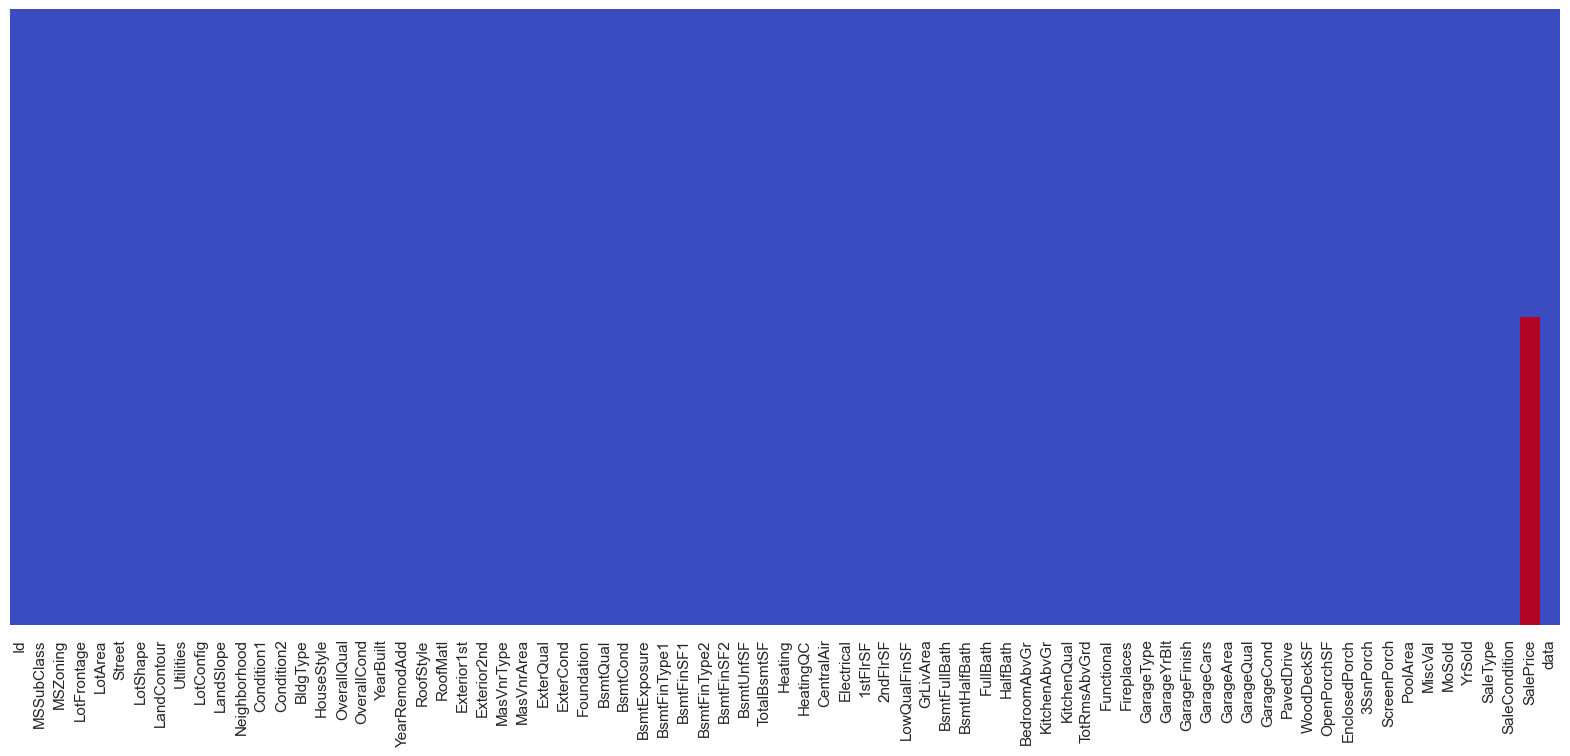

In [88]:
# Let's visually inspect the missing values in our data
plt.figure(figsize=(20,8))
sns.heatmap(all_data1.isnull(), cbar=False, cmap='coolwarm', yticklabels=False)
plt.show()

In [89]:
all_data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2919 non-null   object 
 3   LotFrontage    2919 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2919 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuil

In [90]:
all_data1.isnull().sum().sum()

1459

## One Hot Encoding

In [91]:
all_data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2919 non-null   object 
 3   LotFrontage    2919 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2919 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuil

In [92]:
all_data1.nunique()

Id               2919
MSSubClass         16
MSZoning            5
LotFrontage       128
LotArea          1951
                 ... 
YrSold              5
SaleType            9
SaleCondition       6
SalePrice         663
data                2
Length: 77, dtype: int64

In [93]:
# check for unique values in each variable

for i in all_data1.columns:
  print("No. of unique values in ", i, "is", all_data1[i].nunique())

No. of unique values in  Id is 2919
No. of unique values in  MSSubClass is 16
No. of unique values in  MSZoning is 5
No. of unique values in  LotFrontage is 128
No. of unique values in  LotArea is 1951
No. of unique values in  Street is 2
No. of unique values in  LotShape is 4
No. of unique values in  LandContour is 4
No. of unique values in  Utilities is 2
No. of unique values in  LotConfig is 5
No. of unique values in  LandSlope is 3
No. of unique values in  Neighborhood is 25
No. of unique values in  Condition1 is 9
No. of unique values in  Condition2 is 8
No. of unique values in  BldgType is 5
No. of unique values in  HouseStyle is 8
No. of unique values in  OverallQual is 10
No. of unique values in  OverallCond is 9
No. of unique values in  YearBuilt is 118
No. of unique values in  YearRemodAdd is 61
No. of unique values in  RoofStyle is 6
No. of unique values in  RoofMatl is 8
No. of unique values in  Exterior1st is 15
No. of unique values in  Exterior2nd is 16
No. of unique valu

In [94]:
Columns =['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle',
         'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond',
          'BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional','GarageType','GarageFinish',
         'GarageQual','GarageCond','PavedDrive','SaleType','SaleCondition']

In [95]:
df = pd.get_dummies(all_data1, columns = Columns,drop_first = True)

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Columns: 235 entries, Id to SaleCondition_Partial
dtypes: float64(12), int64(26), object(1), uint8(196)
memory usage: 1.4+ MB


## Label Encoding

In [97]:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()

# df1 = data.copy(deep=True)

# text_data_features = [i for i in list(data.columns) if i not in list(data.describe().columns)]

# print('Label Encoder Transformation')
# for i in text_data_features:
#     df1[i] = le.fit_transform(df1[i])
#     print(i, ' : ', df1[i].unique(), ' = ', le.inverse_transform(df1[i].unique()))

In [98]:
# # Outlier 
# def boxplots(col):
#     sns.boxplot(df[col])
#     plt.show()
    
# for i in list(df.select_dtypes(exclude=['object']).columns)[0:]:
#     boxplots(i)

## Seperating the train and test data

In [99]:
train = df[df['data']=='train']
test = df[df['data']=='test']

In [100]:
train.head(2)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706.0,...,0,0,0,0,1,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978.0,...,0,0,0,0,1,0,0,0,1,0


In [101]:
test.head(2)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,...,0,0,0,0,1,0,0,0,1,0
1,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,...,0,0,0,0,1,0,0,0,1,0


In [102]:
print((train.shape),(test.shape))

(1460, 235) (1459, 235)


In [103]:
test = test.drop(['SalePrice', 'data'], axis=1)

### Divinding the data

In [104]:
X = train.drop(['SalePrice', 'data'], axis=1)
y = train['SalePrice']

In [105]:
X.shape

(1460, 233)

In [106]:
y.shape

(1460,)

## Splitting the data

In [107]:
from sklearn.model_selection import train_test_split

In [108]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Model Building

## Model :1 Linear Regression

In [128]:
from sklearn.linear_model import LinearRegression

In [129]:
LR = LinearRegression()
LR.fit(X_train,y_train)

LinearRegression()

In [130]:
y_predict_train = LR.predict(X_train)
y_predict_test = LR.predict(X_test)


In [131]:
# Evaluation of model

from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

# MSE

In [132]:
train_MSE = mean_squared_error(y_train,y_predict_train)
test_MSE = mean_squared_error(y_test,y_predict_test)

In [133]:
print('train_MSE:',train_MSE)
print()
print('test_MSE:',test_MSE)

train_MSE: 1385716891.7900188

test_MSE: 1267054438.0904539


# MAE

In [134]:
train_MAE = mean_absolute_error(y_train,y_predict_train)
test_MAE = mean_absolute_error(y_test,y_predict_test)

In [135]:
print('train_MSE:',train_MAE)
print()
print('test_MSE:',test_MAE)

train_MSE: 22900.30536593961

test_MSE: 22409.08680821879


# r2_score

In [136]:
test_r2_score =r2_score(y_test,y_predict_test)
test_r2_score

0.8191294019116345

# Feature Scaling

In [137]:


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler_x = ['1stFlrSF','2ndFlrSF','3SsnPorch','BedroomAbvGr','BsmtFinSF1',
            'BsmtFinSF2','BsmtHalfBath','BsmtUnfSF','EnclosedPorch',
            'OpenPorchSF','OverallCond','OverallQual','PoolArea',
'ScreenPorch','TotRmsAbvGrd','TotalBsmtSF','WoodDeckSF','YearBuilt','MiscVal' ]
X[scaler_x] = scaler.fit_transform(X[scaler_x])

In [138]:
X_train,X_test,y_train,y_test = train_test_split(X[scaler_x], y, test_size=0.25, random_state=42)

In [139]:
LR1 = LinearRegression()
LR1.fit(X_train,y_train)

LinearRegression()

In [140]:
y_predict_train1 = LR1.predict(X_train)
y_predict_test1 = LR1.predict(X_test)

### r2_score after feature scaling

In [141]:
test_r2_score =r2_score(y_test,y_predict_test1)
test_r2_score

0.8191294019116345

## Cross Validation


In [142]:
from sklearn.model_selection import cross_val_score

In [143]:
train_validation_score = cross_val_score(LR,X_train,y_train,cv=10)

In [144]:
test_validation_score = cross_val_score(LR,X_test,y_test,cv=10)

In [145]:
print("train_validation_score :",train_validation_score)
print('_-----------------------------','------------------------------')
print("test_validation_score :",test_validation_score)


train_validation_score : [ 0.70766909  0.85764525  0.53235579 -0.02793038  0.77979938  0.83373393
  0.79624852  0.87232824  0.79970182  0.84432571]
_----------------------------- ------------------------------
test_validation_score : [0.80564593 0.86831332 0.7538227  0.82420132 0.76296365 0.7847795
 0.90065289 0.82975046 0.69119414 0.89512023]


In [146]:
print("train_mean_validation_score :",train_validation_score.mean())
print('_-----------------------------','------------------------------')
print("train_max_validation_score :",train_validation_score.max())

train_mean_validation_score : 0.6995877345594275
_----------------------------- ------------------------------
train_max_validation_score : 0.872328236775437


In [147]:
print("test_mean_validation_score :",test_validation_score.mean())
print('_-----------------------------','------------------------------')
print("test_max_validation_score :",test_validation_score.max())

test_mean_validation_score : 0.8116444168519262
_----------------------------- ------------------------------
test_max_validation_score : 0.9006528930045665


## Model:2 

In [151]:
from sklearn.ensemble import RandomForestRegressor

In [153]:
RF = RandomForestRegressor()
RF.fit(X_train,y_train)

RandomForestRegressor()

In [156]:
y_predict_train_rf = RF.predict(X_train)
y_predict_test_rf = RF.predict(X_test)

In [157]:
test_r2_score =r2_score(y_test,y_predict_test_rf)
test_r2_score

0.8731389124776303

In [158]:
train_MSE_rf = mean_squared_error(y_train,y_predict_train_rf)
test_MSE_rf = mean_squared_error(y_test,y_predict_test_rf)

In [159]:
print('train_MSE:',train_MSE_rf)
print()
print('test_MSE:',test_MSE_rf)

train_MSE: 145517128.7009772

test_MSE: 888701124.8100669


# Model:3

In [161]:
from sklearn.ensemble import GradientBoostingRegressor

In [162]:
GB = GradientBoostingRegressor()
GB.fit(X_train,y_train)

GradientBoostingRegressor()

In [163]:
y_predict_train_gb = GB.predict(X_train)
y_predict_test_gb = GB.predict(X_test)

In [164]:
test_r2_score =r2_score(y_test,y_predict_test_gb)
test_r2_score

0.8780656897115326

In [165]:
train_MSE_gb = mean_squared_error(y_train,y_predict_train_gb)
test_MSE_gb = mean_squared_error(y_test,y_predict_test_gb)

In [166]:
print('train_MSE:',train_MSE_gb)
print()
print('test_MSE:',test_MSE_gb)

train_MSE: 295261905.81590223

test_MSE: 854187527.6545522


In [167]:
train_validation_score1 = cross_val_score(GB,X_train,y_train,cv=10)
test_validation_score1 = cross_val_score(GB,X_test,y_test,cv=10)

In [168]:
print("train_validation_score :",train_validation_score1)
print('_-----------------------------','------------------------------')
print("test_validation_score :",test_validation_score1)


train_validation_score : [0.85093761 0.90398973 0.6604417  0.70752306 0.87738154 0.86473993
 0.85453696 0.88801832 0.83388783 0.90662467]
_----------------------------- ------------------------------
test_validation_score : [0.86423679 0.82074001 0.789147   0.83738202 0.86771785 0.77993121
 0.85856167 0.86131889 0.76243837 0.88014188]


In [169]:
print("train_mean_validation_score :",train_validation_score1.mean())
print('_-----------------------------','------------------------------')
print("train_max_validation_score :",train_validation_score1.max())

train_mean_validation_score : 0.8348081365767357
_----------------------------- ------------------------------
train_max_validation_score : 0.9066246711403037


In [170]:
print("test_mean_validation_score :",test_validation_score1.mean())
print('_-----------------------------','------------------------------')
print("test_max_validation_score :",test_validation_score1.max())

test_mean_validation_score : 0.8321615696831677
_----------------------------- ------------------------------
test_max_validation_score : 0.880141877327308


# PREDICT THE RESULT FOR TEST DATA SET

In [171]:
test.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,...,0,0,0,0,1,0,0,0,1,0
1,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,...,0,0,0,0,1,0,0,0,1,0
2,1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,...,0,0,0,0,1,0,0,0,1,0
3,1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,...,0,0,0,0,1,0,0,0,1,0
4,1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,...,0,0,0,0,1,0,0,0,1,0


In [172]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler_test = ['1stFlrSF','2ndFlrSF','3SsnPorch','BedroomAbvGr','BsmtFinSF1',
            'BsmtFinSF2','BsmtHalfBath','BsmtUnfSF','EnclosedPorch',
            'OpenPorchSF','OverallCond','OverallQual','PoolArea',
'ScreenPorch','TotRmsAbvGrd','TotalBsmtSF','WoodDeckSF','YearBuilt','MiscVal' ]
test_scaled = scaler.fit_transform(test[scaler_test])

In [173]:
final_result = GB.predict(test_scaled)

In [174]:
final_result

array([121272.89603188, 168788.7393307 , 168436.63170779, ...,
       166584.3697947 , 132203.66216992, 248333.18640431])

In [175]:
final_result_1 = pd.concat([test, pd.DataFrame(final_result)], axis=1)

In [177]:
final_result_1.columns

Index([                   'Id',            'MSSubClass',
                 'LotFrontage',               'LotArea',
                 'OverallQual',           'OverallCond',
                   'YearBuilt',          'YearRemodAdd',
                  'MasVnrArea',            'BsmtFinSF1',
       ...
              'SaleType_ConLw',          'SaleType_New',
                'SaleType_Oth',           'SaleType_WD',
       'SaleCondition_AdjLand',  'SaleCondition_Alloca',
        'SaleCondition_Family',  'SaleCondition_Normal',
       'SaleCondition_Partial',                       0],
      dtype='object', length=234)

In [178]:
final_result_1 = final_result_1.rename(columns = {0 : "SalePrice"})

In [179]:
final_result_1

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,...,0,0,0,1,0,0,0,1,0,121272.896032
1,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,...,0,0,0,1,0,0,0,1,0,168788.739331
2,1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,...,0,0,0,1,0,0,0,1,0,168436.631708
3,1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,...,0,0,0,1,0,0,0,1,0,183286.031542
4,1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,...,0,0,0,1,0,0,0,1,0,213814.120943
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,21.0,1936,4,7,1970,1970,0.0,0.0,...,0,0,0,1,0,0,0,1,0,97751.006222
1455,2916,160,21.0,1894,4,5,1970,1970,0.0,252.0,...,0,0,0,1,0,0,0,0,0,90165.638061
1456,2917,20,160.0,20000,5,7,1960,1996,0.0,1224.0,...,0,0,0,1,0,0,0,0,0,166584.369795
1457,2918,85,62.0,10441,5,5,1992,1992,0.0,337.0,...,0,0,0,1,0,0,0,1,0,132203.662170


In [181]:
submission = final_result_1[['Id','SalePrice']]

In [182]:
submission.to_csv("submission.csv",index = None)